##Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as an
import matplotlib.pyplot as plt
import seaborn as sns

Dans ce notebook, nous allons introduire l'analyse de series temporelles. Une série temporelle est une série dont l'index est le temps. Un exemeple de série temporelle est la temperature d'un pays sur une année, le prix du bitcoin ces 6 derniers mois. Ces mois valeurs diminuent ou augmentent en fonction du temps. Les analyser nous permetdonc , d'identifier les tendances, la saisonabilité, et plus encore

Pour ce projet, nous allons utiliser des données de consommation Y'énergie electrique et également de production en énergie solaire et éolienne en Allemagne de 2006 à 2017

J'ai refait ce projet en m'inspirant de la video de Youtube Kevin Degila dont le lien est le suivant https://www.youtube.com/watch?v=G8hlwGEppiM&list=PL049bGjkT7dLJo748aOvXnUg0YtR1tacv&index=28

In [2]:
energy = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [3]:
energy.shape

(4383, 5)

In [4]:
energy.sample(5)

,Date,Consumption,Wind,Solar,Wind+Solar
3497,2015-07-30,1370.350,396.157,151.511,547.668
1891,2011-03-07,1412.353,92.244,NaN,NaN
1402,2009-11-03,1430.793,NaN,NaN,NaN
1821,2010-12-27,1339.740,48.360,NaN,NaN
311,2006-11-08,1518.364,NaN,NaN,NaN


In [5]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


On peut constater que "Date" est type "Object", ce qui nous arrange pas. Nous allons donc le convertir en type "Date"

In [6]:
energy['Date']

0       2006-01-01
1       2006-01-02
2       2006-01-03
3       2006-01-04
4       2006-01-05
           ...    
4378    2017-12-27
4379    2017-12-28
4380    2017-12-29
4381    2017-12-30
4382    2017-12-31
Name: Date, Length: 4383, dtype: object

In [7]:
energy['Date'] = pd.to_datetime(energy['Date'])

In [8]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


Maintenant la colonne "Date" a bien été converti en type "Date"

In [9]:
energy = energy.set_index('Date')

In [10]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


Proportion des valeurs manquantes

In [11]:
energy.isnull().mean()

Consumption    0.000000
Wind           0.333790
Solar          0.500799
Wind+Solar     0.501027
dtype: float64

In [12]:
energy.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [13]:
energy.index[:5]

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [14]:
energy.index[:5].year

Int64Index([2006, 2006, 2006, 2006, 2006], dtype='int64', name='Date')

In [15]:
energy.index[:5].month

Int64Index([1, 1, 1, 1, 1], dtype='int64', name='Date')

In [16]:
energy.index[:5].day

Int64Index([1, 2, 3, 4, 5], dtype='int64', name='Date')

In [17]:
energy.index[:5].day_name

<bound method _inherit_from_data.<locals>.method of DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)>

Creation des colonnes(features) relatives à la date:

In [18]:
energy['Year'] = energy.index.year

In [19]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar,Year
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006
2006-01-02,1380.521,NaN,NaN,NaN,2006
2006-01-03,1442.533,NaN,NaN,NaN,2006
2006-01-04,1457.217,NaN,NaN,NaN,2006
2006-01-05,1477.131,NaN,NaN,NaN,2006


In [23]:
energy.Year.value_counts()

2008    366
2012    366
2016    366
2006    365
2007    365
2009    365
2010    365
2011    365
2013    365
2014    365
2015    365
2017    365
Name: Year, dtype: int64

In [24]:
energy['Month'] = energy.index.month
energy['day_name'] = energy.index.day_name()

In [25]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


In [27]:
energy['is_weekend'] = energy.day_name.isin(["Sunday", "Saturday"])

In [28]:
energy.day_name == 'Saturday' | energy.day_name == 'Sunday' # ce qui ne fonctionnera pas

TypeError: ignored

In [29]:
(energy.day_name == 'Saturday') &   (energy.day_name == 'Sunday')

Date
2006-01-01    False
2006-01-02    False
2006-01-03    False
2006-01-04    False
2006-01-05    False
              ...  
2017-12-27    False
2017-12-28    False
2017-12-29    False
2017-12-30    False
2017-12-31    False
Name: day_name, Length: 4383, dtype: bool

In [30]:
energy

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday,True
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday,False
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday,False
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday,False
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday,False
...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,False
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,False
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,False


In [31]:
energy.Year.max()

2017

In [32]:
energy.loc["2016-12-23": "2016-12-26"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2016-12-23,1415.811,395.296,16.111,411.407,2016,12,Friday,False
2016-12-24,1195.354,681.509,12.843,694.352,2016,12,Saturday,True
2016-12-25,1117.673,719.778,6.608,726.386,2016,12,Sunday,True
2016-12-26,1121.213,718.160,15.463,733.623,2016,12,Monday,False


### Consommation en énergie au fil des années

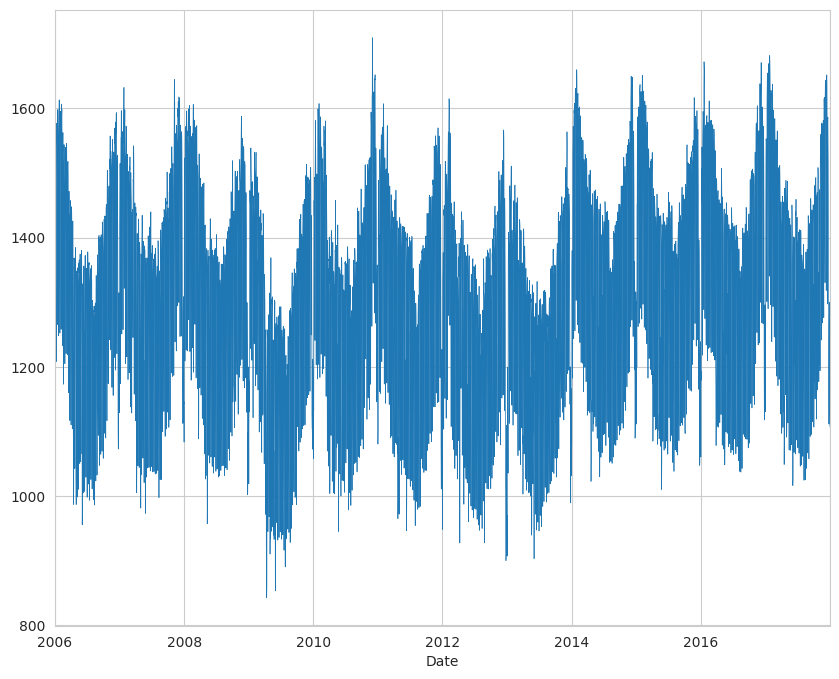

In [35]:
sns.set_style("whitegrid")
energy['Consumption'].plot(linewidth=.5, figsize=(10,8));

### Quel est le jour avec le plus de consommation globale?

In [38]:
# Le jour avec le plus de consommation
energy.groupby('day_name').sum()['Consumption'].sort_values()

day_name
Sunday       691646.51735
Saturday     751544.19949
Monday       870006.24492
Friday       873034.67157
Thursday     889645.06681
Tuesday      894101.79246
Wednesday    897437.69479
Name: Consumption, dtype: float64

In [39]:
groupday = energy.groupby('day_name').sum()['Consumption'].reset_index()
groupday

,day_name,Consumption
0,Friday,873034.67157
1,Monday,870006.24492
2,Saturday,751544.19949
3,Sunday,691646.51735
4,Thursday,889645.06681
5,Tuesday,894101.79246
6,Wednesday,897437.69479


<Axes: xlabel='day_name', ylabel='Consumption'>

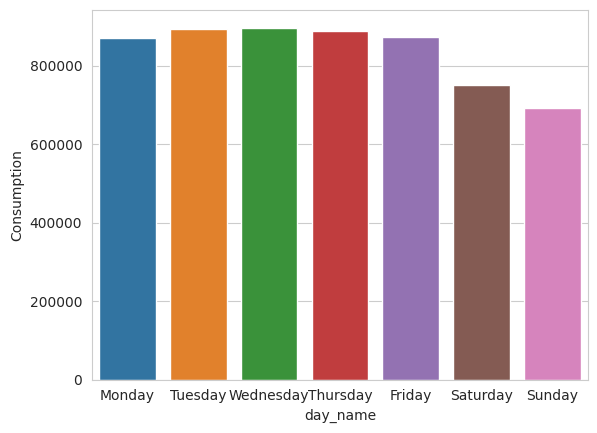

In [41]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x = groupday['day_name'], y = groupday['Consumption'], order = order)

In [42]:
energy.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

###Consommation annuelle

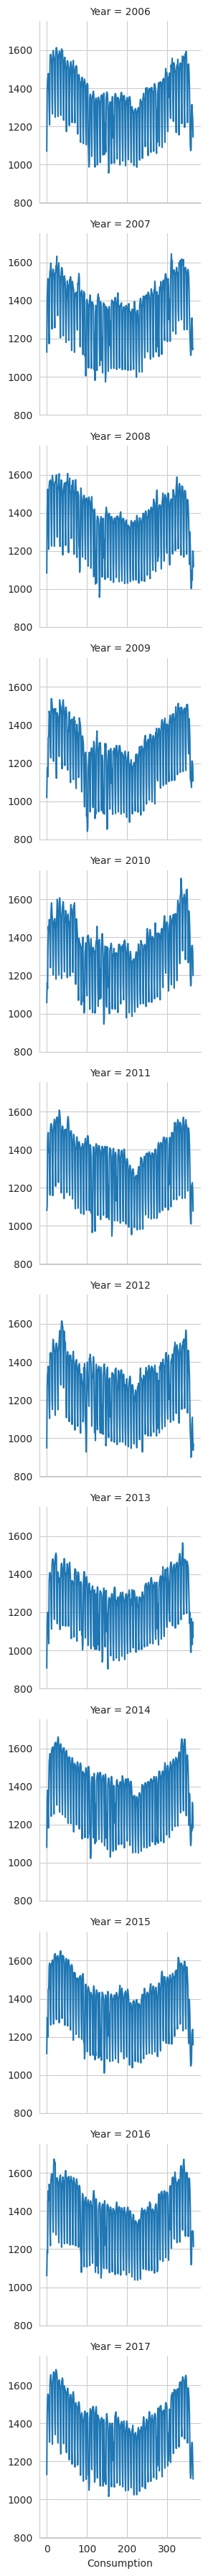

In [45]:
grid= sns.FacetGrid(energy, row="Year")
grid.map(plt.plot, 'Consumption');

In [46]:
data = energy.loc['2016'].copy()

In [48]:
data

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2016-01-01,1060.366,107.209,18.563,125.772,2016,1,Friday,False
2016-01-02,1192.698,409.622,9.406,419.028,2016,1,Saturday,True
2016-01-03,1179.282,406.296,13.519,419.815,2016,1,Sunday,True
2016-01-04,1456.294,278.460,10.080,288.540,2016,1,Monday,False
2016-01-05,1506.737,206.468,12.549,219.017,2016,1,Tuesday,False
...,...,...,...,...,...,...,...,...
2016-12-27,1289.324,640.895,23.448,664.343,2016,12,Tuesday,False
2016-12-28,1294.881,214.990,19.450,234.440,2016,12,Wednesday,False
2016-12-29,1295.897,167.698,42.910,210.608,2016,12,Thursday,False


In [49]:
energy.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [50]:
data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

(16801.0, 17166.0)

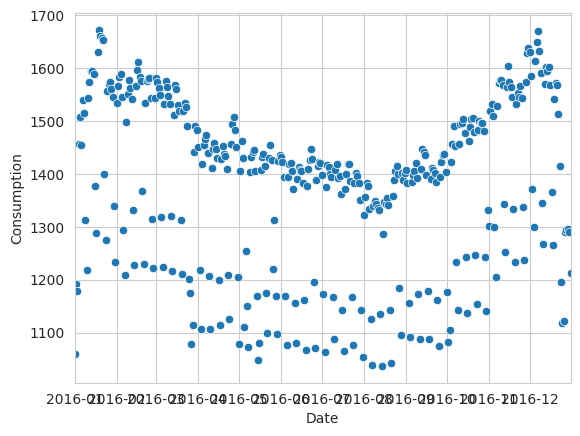

In [53]:
sns.scatterplot(x = data.index, y = data['Consumption'])
plt.xlim(data.index.min(), data.index.max())

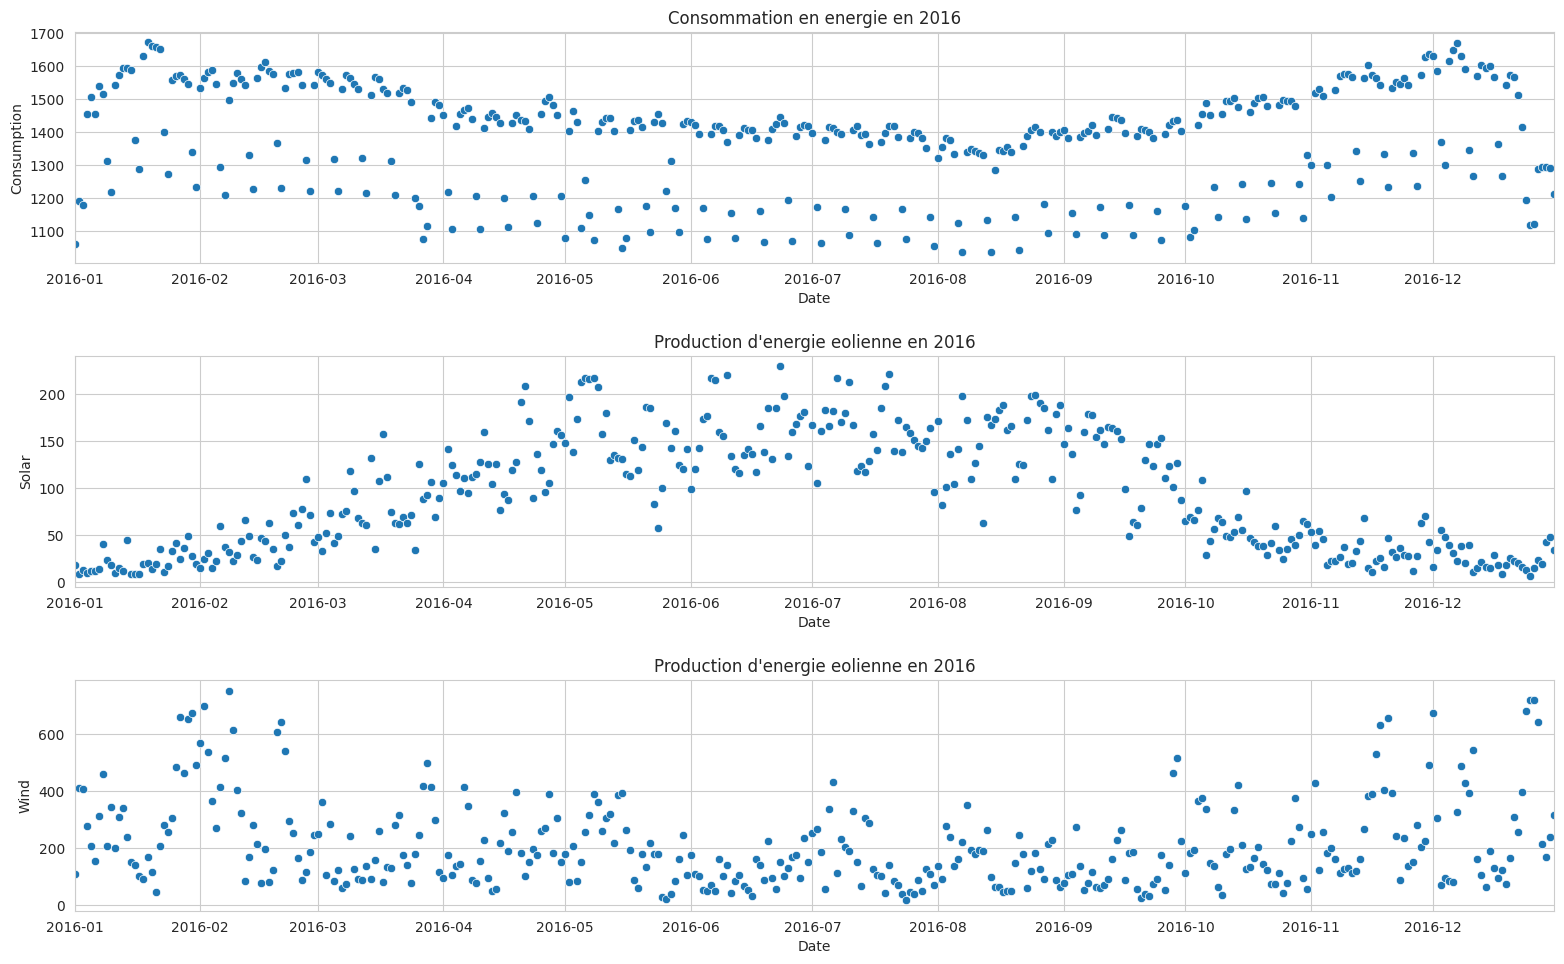

In [55]:
fig, axes = plt.subplots(figsize=(16, 10), nrows=3, ncols=1)

sns.scatterplot(data = data, x = data.index, y = 'Consumption', ax = axes[0])
axes[0].set_title('Consommation en energie en 2016')
axes[0].set_xlim(data.index.min(), data.index.max())

sns.scatterplot(data = data, x = data.index, y = 'Solar', ax = axes[1])
axes[1].set_title("Production d'energie eolienne en 2016")
axes[1].set_xlim(data.index.min(), data.index.max())

sns.scatterplot(data = data, x = data.index, y = 'Wind', ax = axes[2])
axes[2].set_title("Production d'energie eolienne en 2016")
axes[2].set_xlim(data.index.min(), data.index.max())
fig.tight_layout(pad=2)

<Axes: xlabel='Date', ylabel='Consumption'>

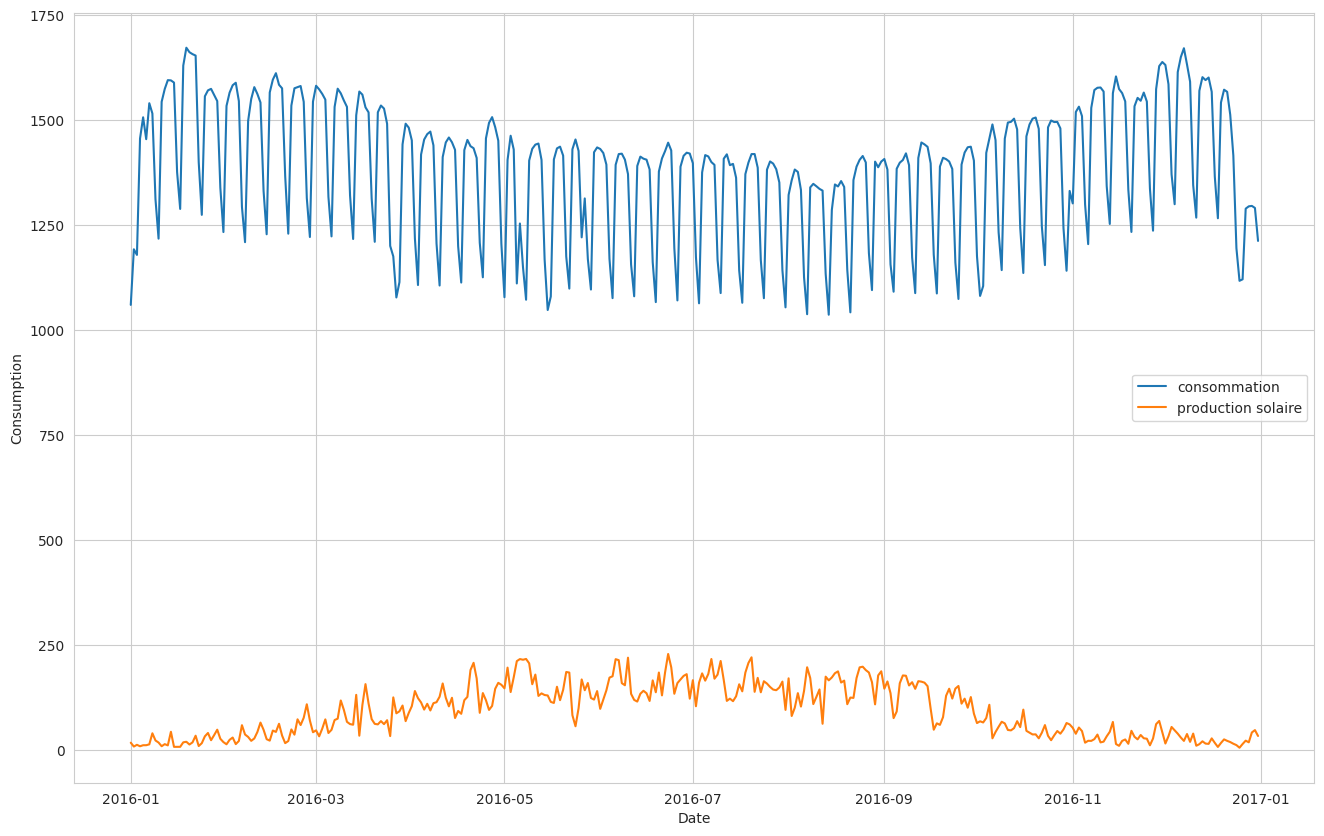

In [56]:
fig, ax = plt.subplots(figsize=(16, 10), nrows=1, ncols=1)
sns.lineplot(data =data, x = data.index, y='Consumption', ax=ax, legend='brief', label='consommation')


sns.lineplot(data =data, x = data.index, y='Solar',ax=ax, legend='brief', label='production solaire')




In [57]:
energy.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'Year', 'Month',
       'day_name', 'is_weekend'],
      dtype='object')

### Consommation mensuelle

<Axes: xlabel='Month', ylabel='Consumption'>

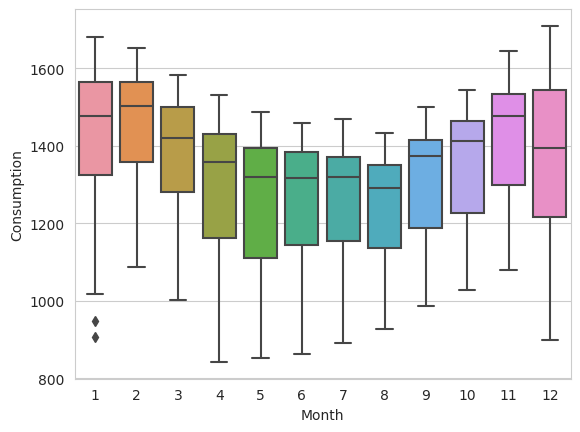

In [58]:
sns.boxplot(data=energy, x="Month", y="Consumption")

In [59]:
energy.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'Year', 'Month',
       'day_name', 'is_weekend'],
      dtype='object')

In [60]:
energy["day_name"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

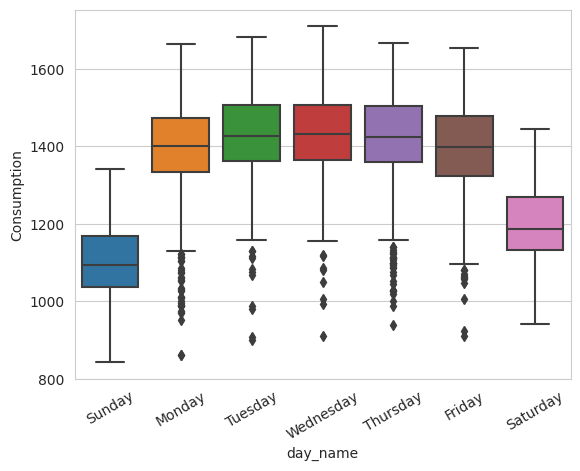

In [61]:
g = sns.boxplot(data=energy, x="day_name", y ="Consumption")
g.set_xticklabels(rotation=30, labels=energy["day_name"].unique());

###Consommation en semaine vs Weekend

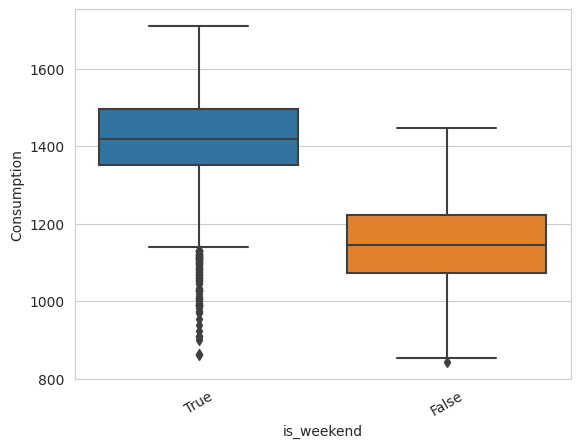

In [62]:
g = sns.boxplot(data=energy, x="is_weekend", y = "Consumption")
g.set_xticklabels(rotation=30, labels = energy["is_weekend"].unique());

###Resampling

###Consommation par semaine

In [63]:
energy.drop(['Year', 'Month', 'is_weekend'], axis=1).resample('W').mean()  # W pour weekend


<ipython-input-63-595e7a4e4245>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  energy.drop(['Year', 'Month', 'is_weekend'], axis=1).resample('W').mean()  # W pour weekend


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


### Consommation en moyenne par mois

In [66]:
conso_par_mois = energy.drop(["Year", "Month", "is_weekend"], axis=1).resample('M').mean()
conso_par_mois

<ipython-input-66-227adaaedbf5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  conso_par_mois = energy.drop(["Year", "Month", "is_weekend"], axis=1).resample('M').mean()


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,1461.442065,NaN,NaN,NaN
2006-02-28,1467.106893,NaN,NaN,NaN
2006-03-31,1418.649161,NaN,NaN,NaN
2006-04-30,1275.058900,NaN,NaN,NaN
2006-05-31,1253.488484,NaN,NaN,NaN
...,...,...,...,...
2017-08-31,1291.283022,177.412839,148.477677,325.890516
2017-09-30,1335.952031,209.591000,102.643033,312.234033
2017-10-31,1366.297385,402.583774,68.727645,471.311419


### Consommation par trimestre

In [67]:
energy.drop(["Year", "Month", "is_weekend"], axis=1).resample('Q').sum() # Q pour Quater


<ipython-input-67-3e622f4ea9aa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  energy.drop(["Year", "Month", "is_weekend"], axis=1).resample('Q').sum() # Q pour Quater


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-03-31,130361.82100,0.000,0.000,0.000
2006-06-30,114363.36000,0.000,0.000,0.000
2006-09-30,116664.13500,0.000,0.000,0.000
2006-12-31,127679.22000,0.000,0.000,0.000
2007-03-31,129072.56700,0.000,0.000,0.000
2007-06-30,116357.37300,0.000,0.000,0.000
2007-09-30,119972.07200,0.000,0.000,0.000
2007-12-31,131229.83500,0.000,0.000,0.000
2008-03-31,131525.92900,0.000,0.000,0.000
